<a href="https://colab.research.google.com/github/Nanoth-T/Learning-Machine-Learning/blob/main/credit_card_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Customer Churn prediction**
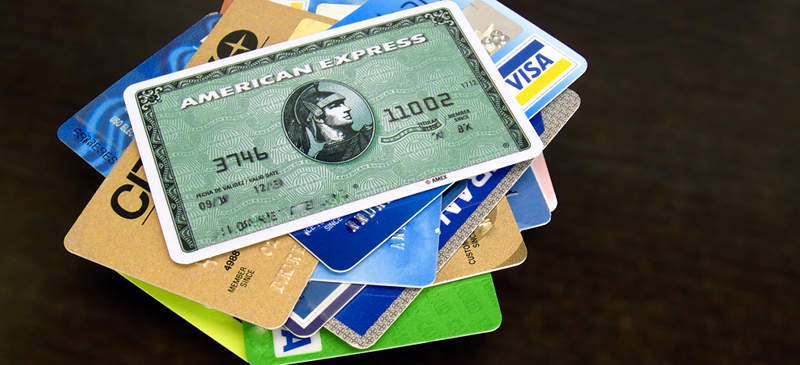

# **CRIPS-DM Step**

Business Understanding


> Indented block

Data Understanding


> Indented block

Prepare Data


> Indented block

Modeling


> Indented block

Evaluation


> Indented block

Deployment

> Indented block



# **Importing Libraries, Metrics**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **About Dataset**
* Credit Card Customers Prediction (https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?select=BankChurners.csv)

> Predict Churning Customers อัตราการสูญเสียลูกค้า

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/งานตอนนี้/FDS_pj/BankChurners.csv')

In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.size

232921

# Selecting the features

In [ ]:
df.drop(["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df.describe(include='all')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


# Prepare Data

In [ ]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [ ]:
df.agg(['unique'])

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
unique,"[Existing Customer, Attrited Customer]","[45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3...","[M, F]","[3, 5, 4, 2, 0, 1]","[High School, Graduate, Uneducated, Unknown, C...","[Married, Single, Unknown, Divorced]","[$60K - $80K, Less than $40K, $80K - $120K, $4...","[Blue, Gold, Silver, Platinum]","[39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 3...","[5, 6, 4, 3, 2, 1]","[1, 4, 2, 3, 6, 0, 5]","[3, 2, 0, 1, 4, 5, 6]","[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...","[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...","[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....","[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...","[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...","[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...","[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...","[0.061, 0.105, 0.0, 0.76, 0.311, 0.066, 0.048,..."


In [ ]:
print((df['Education_Level'] == 'Unknown').sum())
print((df['Marital_Status'] == 'Unknown').sum())

1519
749


In [ ]:
df.drop(df[df['Education_Level'] == 'Unknown'].index, inplace = True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.drop(df[df['Marital_Status'] == 'Unknown'].index, inplace = True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7973 non-null   object 
 1   Customer_Age              7973 non-null   int64  
 2   Gender                    7973 non-null   object 
 3   Dependent_count           7973 non-null   int64  
 4   Education_Level           7973 non-null   object 
 5   Marital_Status            7973 non-null   object 
 6   Income_Category           7973 non-null   object 
 7   Card_Category             7973 non-null   object 
 8   Months_on_book            7973 non-null   int64  
 9   Total_Relationship_Count  7973 non-null   int64  
 10  Months_Inactive_12_mon    7973 non-null   int64  
 11  Contacts_Count_12_mon     7973 non-null   int64  
 12  Credit_Limit              7973 non-null   float64
 13  Total_Revolving_Bal       7973 non-null   int64  
 14  Avg_Open

In [ ]:
df.duplicated().sum()

0

# **outliers**

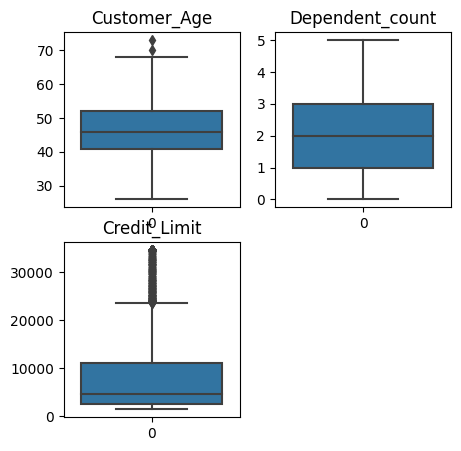

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.title('Customer_Age')
sns.boxplot(df["Customer_Age"])
plt.subplot(2,2,2)
plt.title('Dependent_count')
sns.boxplot(df["Dependent_count"])
plt.subplot(2,2,3)
plt.title('Credit_Limit')
sns.boxplot(df["Credit_Limit"])
plt.show()

In [ ]:
pct_age = np.percentile(df['Customer_Age'], [25,75])
iqr_age = pct_age[1] - pct_age[0]
df = df.loc[(df['Customer_Age'])>=(pct_age[0]-(1.5*iqr_age)),:]
df = df.loc[(df['Customer_Age'])<=(pct_age[1]+(1.5*iqr_age)),:]
df = df.reset_index(drop=True)
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,46.360682,2.329444,35.994605,3.821101,2.345879,2.457283,8590.385397,1165.049931,7425.335466,0.760814,4377.810187,64.707816,0.712003,0.276382
std,8.100436,1.294079,8.051908,1.543306,1.003345,1.104355,9056.015315,813.049263,9060.680886,0.222261,3407.211763,23.578978,0.239975,0.275753
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2550.000000,450.500000,1324.500000,0.631000,2133.000000,45.000000,0.583000,0.025000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4523.000000,1281.000000,3455.000000,0.736000,3873.000000,67.000000,0.700000,0.178000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,10973.000000,1783.500000,9800.000000,0.859000,4739.000000,81.000000,0.818000,0.504000
max,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,138.000000,3.714000,0.999000


# **Profiling**

In [ ]:
profile = pp.ProfileReport(df)

In [ ]:
profile.to_file("credit.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

# **Modeling**


# One-Hot Encoding and Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df["Attrition_Flag"]
X = df.drop("Attrition_Flag", axis =1)
X = pd.get_dummies(X, columns=["Income_Category","Card_Category","Gender"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
df = pd.get_dummies(df, columns=["Income_Category","Card_Category","Gender", "Education_Level", "Marital_Status"])

In [ ]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,0,0,1,0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,1,0,0,0,0,0,1
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,1,0,0,0,0,1,0
3,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,0,0,1,0,1,0
4,Existing Customer,44,2,36,3,1,2,4010.0,1247,2763.0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,Existing Customer,54,1,34,5,2,0,13940.0,2109,11831.0,...,1,0,0,0,1,0,0,0,0,1
7967,Existing Customer,56,1,50,4,1,4,3688.0,606,3082.0,...,0,0,0,1,0,0,0,0,0,1
7968,Existing Customer,50,2,40,3,2,3,4003.0,1851,2152.0,...,1,0,0,1,0,0,0,0,0,1
7969,Attrited Customer,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X.head()

,Customer_Age,Dependent_count,Credit_Limit,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,45,3,12691.0,0,0,1,0,0,0,1,0,0,0,0,1
1,49,5,8256.0,0,0,0,0,1,0,1,0,0,0,1,0
2,51,3,3418.0,0,0,0,1,0,0,1,0,0,0,0,1
3,40,4,3313.0,0,0,0,0,1,0,1,0,0,0,1,0
4,40,3,4716.0,0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
X_train.shape

(7388, 15)

In [ ]:
X_test.shape

(2463, 15)

# Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df = df.apply(labelencoder.fit_transform)
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,19,3,26,4,1,3,3942,296,4221,...,1,0,0,0,1,0,0,0,1,0
1,1,23,5,31,5,1,2,3133,380,3420,...,0,0,0,1,0,0,0,0,0,1
2,1,25,3,23,3,1,0,1456,0,2206,...,1,0,0,1,0,0,0,0,1,0
3,1,14,3,8,4,1,0,2098,0,2713,...,1,0,0,0,0,0,1,0,1,0
4,1,18,2,23,2,1,2,1761,746,1916,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,1,28,1,21,4,2,0,4120,1570,4206,...,1,0,0,0,1,0,0,0,0,1
7967,1,30,1,37,3,1,4,1613,153,2050,...,0,0,0,1,0,0,0,0,0,1
7968,1,24,2,27,2,2,3,1756,1332,1597,...,1,0,0,1,0,0,0,0,0,1
7969,0,18,1,23,4,3,4,2345,0,2928,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train =  label.fit_transform(y_train)
y_test = label.transform(y_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Attrition_Flag'],
                                                    test_size=0.3, random_state=42)

# Machine Learning Models


> Decision Tree Classification Algorithm


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = classifier.predict(X_test)#Accuracy

In [ ]:
accuracy_score(y_test,y_pred)

0.9188963210702341